<a href="https://colab.research.google.com/github/lukaszplust/Machine-Learning/blob/main/pierdy_ze_studiow_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA

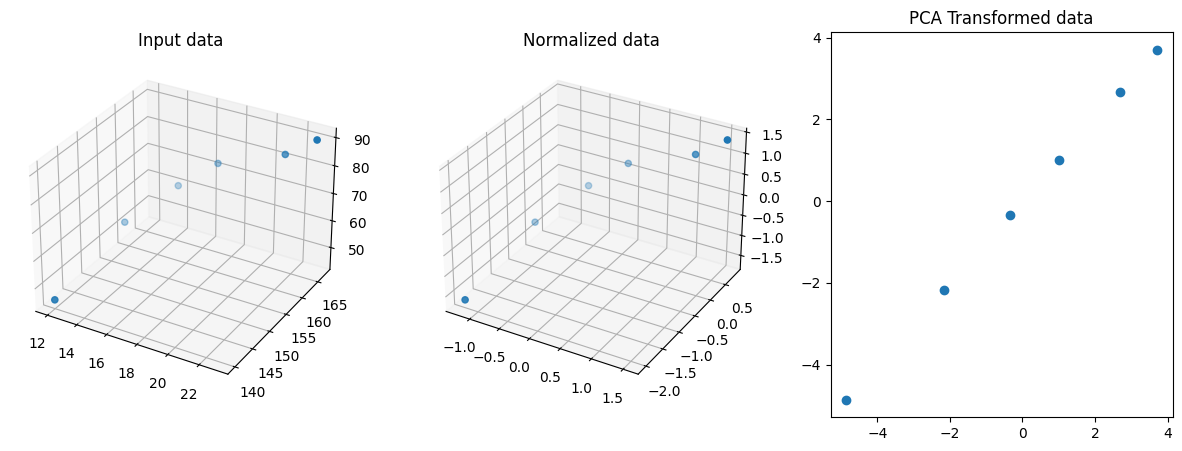

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dane wejściowe
data = [[12, 140, 45],
        [13, 155, 58],
        [15, 162, 67],
        [17, 165, 75],
        [21, 167, 82],
        [23, 167, 90]]


# Definicja funkcji pomocniczych
def mean(data):
    return sum(data) / len(data)


def std_dev(data):
    m = mean(data)
    return (sum((x - m) ** 2 for x in data) / len(data)) ** 0.5


def covariance(x, y):
    n = len(x)
    return sum((x[i] - mean(x)) * (y[i] - mean(y)) for i in range(n)) / (n - 1)


def covariance_matrix(data):
    data = list(map(list, zip(*data)))  # Transpose data
    cov_matrix = [[covariance(col1, col2) for col1 in data] for col2 in data]
    return cov_matrix


def eigenvalue(A, v):
    n = len(A)
    Av = [0] * n
    for i in range(n):
        for j in range(n):
            Av[i] += A[i][j] * v[j]
    return sum(Av) / sum(v)


def eigenvector(A, tol=0.00001):
    n = len(A)
    start_vector = [1] * n
    eigenvalue1 = eigenvalue(A, start_vector)
    eigenvalue2 = 0
    while abs(eigenvalue1 - eigenvalue2) > tol:
        eigenvalue2 = eigenvalue1
        start_vector = [sum(A[i][j] * start_vector[j] for j in range(n)) for i in range(n)]
        norm = sum(x ** 2 for x in start_vector) ** 0.5
        start_vector = [x / norm for x in start_vector]
        eigenvalue1 = eigenvalue(A, start_vector)
    return start_vector


# Wykres danych wejściowych 3D
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(*zip(*data))
ax.set_title('Input data')

# Definicja funkcji pomocniczych
# [Kod funkcji pomocniczych]

# Standaryzacja danych
normalized_data = [[(x - mean(col)) / std_dev(col) for x in col] for col in zip(*data)]

# Wykres danych znormalizowanych 3D
ax = fig.add_subplot(132, projection='3d')
ax.scatter(*normalized_data)
ax.set_title('Normalized data')

# Obliczenie macierzy kowariancji
cov_matrix = covariance_matrix(normalized_data)

# Obliczenie wektorów własnych macierzy kowariancji
eigenvectors = [eigenvector(cov_matrix) for _ in range(len(cov_matrix))]

# Transformacja danych
transformed_data = [[sum(eigenvectors[i][j] * normalized_data[j][k] for j in range(len(normalized_data))) for i in range(len(eigenvectors))] for k in range(len(normalized_data[0]))]
transformed_data = list(map(list, zip(*transformed_data)))

# Wykres danych po transformacji PCA 2D
ax = fig.add_subplot(133)
ax.scatter(*transformed_data[:2])
ax.set_title('PCA Transformed data')

plt.show()

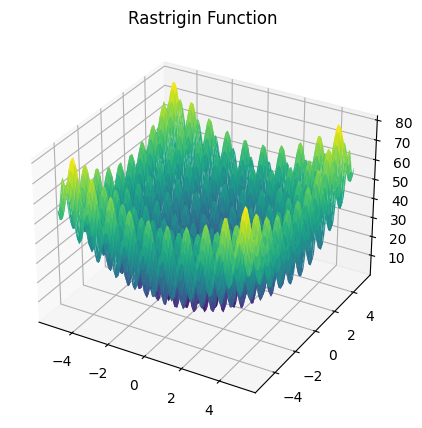

random:  12.722038516618234
gradient:  15.5542836280076
annealing:  7.991372274331312


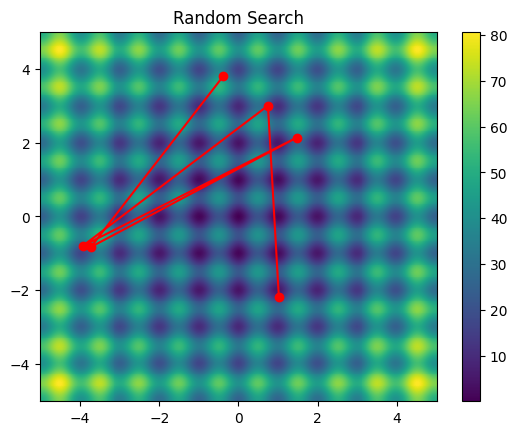

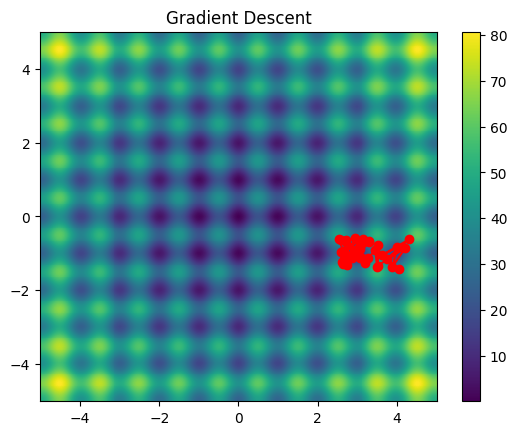

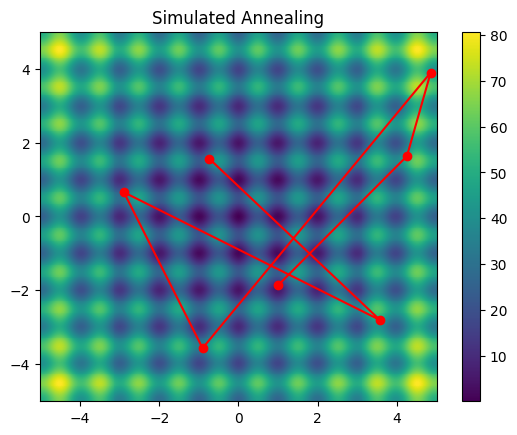

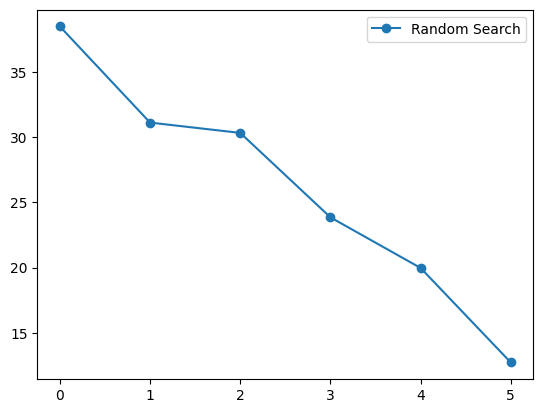

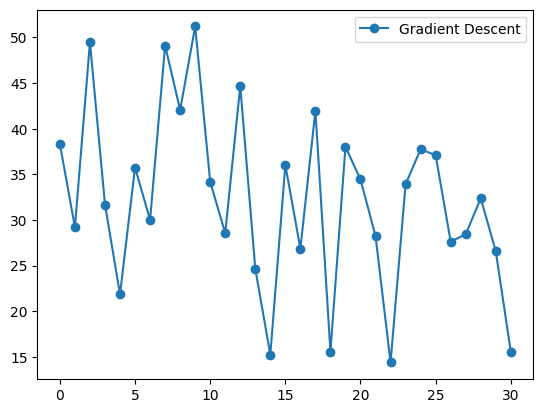

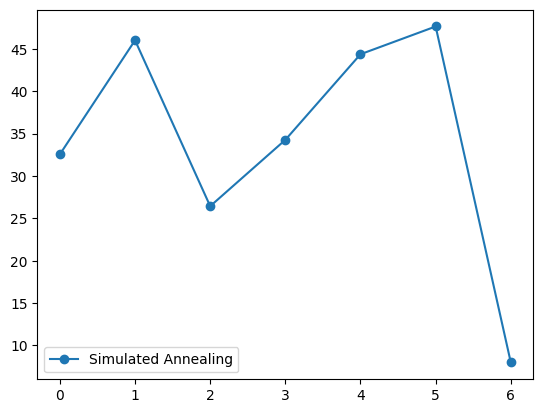

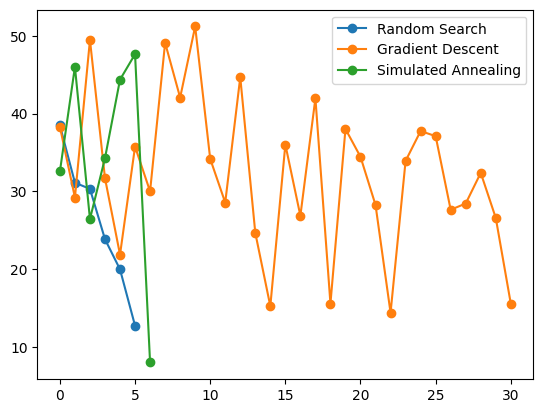

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def rastrigin_func(x, y):
    return 20 + (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y))
def rastrigin_grad(x, y):
    return 2*x + 20*np.pi*np.sin(2*np.pi*x), 2*y + 20*np.pi*np.sin(2*np.pi*y)
def plot_rastrigin_3D():
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(-5.12, 5.12, 100)
    y = np.linspace(-5.12, 5.12, 100)
    x, y = np.meshgrid(x, y)
    z = rastrigin_func(x, y)

    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_title('Rastrigin Function')

    plt.show()

plot_rastrigin_3D()


def random_search(func, low=-5, high=5, iter=10):
    x_min, y_min = np.random.uniform(low, high, 2)
    f_min = func(x_min, y_min)
    history = [(x_min, y_min, f_min)]

    for _ in range(iter):
        x, y = np.random.uniform(low, high, 2)
        f_val = func(x, y)
        if f_val < f_min:
            f_min = f_val
            x_min, y_min = x, y
            history.append((x, y, f_val))

    return x_min, y_min, history


def gradient_descent(func, grad, low=-5, high=5, alpha=0.01, iter=10):
    x_min, y_min = np.random.uniform(low, high, 2)
    f_min = func(x_min, y_min)
    history = [(x_min, y_min, f_min)]

    for _ in range(iter):
        grad_x, grad_y = grad(x_min, y_min)
        x_min, y_min = x_min - alpha * grad_x, y_min - alpha * grad_y
        f_val = func(x_min, y_min)
        if f_val < f_min:
            f_min = f_val
        history.append((x_min, y_min, f_val))

    return x_min, y_min, history


def simulated_annealing(func, low=-5, high=5, T=1000.0, cool_rate=0.5, iter=10):
    x_min, y_min = np.random.uniform(low, high, 2)
    f_min = func(x_min, y_min)
    history = [(x_min, y_min, f_min)]

    for i in range(iter):
        T *= cool_rate
        x, y = np.random.uniform(low, high, 2)
        f_val = func(x, y)
        delta = f_val - f_min
        if delta < 0 or np.exp(-delta / T) > np.random.rand():
            x_min, y_min = x, y
            f_min = f_val
            history.append((x_min, y_min, f_val))

    return x_min, y_min, history


def plot_function_history(history, title):
    fig, ax = plt.subplots()
    ax.plot([h[2] for h in history], 'o-', label=title)
    ax.legend()
    plt.show()


def plot_search_history_with_background(history, title):
    fig, ax = plt.subplots()

    # tworzenie siatki punktów
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    x, y = np.meshgrid(x, y)

    # obliczanie wartości funkcji na siatce punktów
    z = rastrigin_func(x, y)

    # rysowanie wartości funkcji jako tła
    c = ax.pcolormesh(x, y, z, cmap='viridis', shading='auto')
    fig.colorbar(c, ax=ax)

    # rysowanie trajektorii poszukiwań
    x = [h[0] for h in history]
    y = [h[1] for h in history]
    ax.plot(x, y, 'o-', color='r')

    ax.set_title(title)
    plt.show()

# Testowanie
iter = 30
x_min_rand, y_min_rand, history_rand = random_search(rastrigin_func, iter=iter)
x_min_grad, y_min_grad, history_grad = gradient_descent(rastrigin_func, rastrigin_grad, iter=iter)
x_min_anneal, y_min_anneal, history_anneal = simulated_annealing(rastrigin_func, iter=iter)

print("random: ", rastrigin_func(x_min_rand, y_min_rand))
print("gradient: ", rastrigin_func(x_min_grad, y_min_grad))
print("annealing: ", rastrigin_func(x_min_anneal, y_min_anneal))

plot_search_history_with_background(history_rand, 'Random Search')
plot_search_history_with_background(history_grad, 'Gradient Descent')
plot_search_history_with_background(history_anneal, 'Simulated Annealing')

# Drawing plot for function value change
plot_function_history(history_rand, 'Random Search')
plot_function_history(history_grad, 'Gradient Descent')
plot_function_history(history_anneal, 'Simulated Annealing')




# Drawing plot for function value change
fig, ax = plt.subplots()
ax.plot([h[2] for h in history_rand], 'o-', label='Random Search')
ax.plot([h[2] for h in history_grad], 'o-', label='Gradient Descent')
ax.plot([h[2] for h in history_anneal], 'o-', label='Simulated Annealing')
ax.legend()
plt.show()

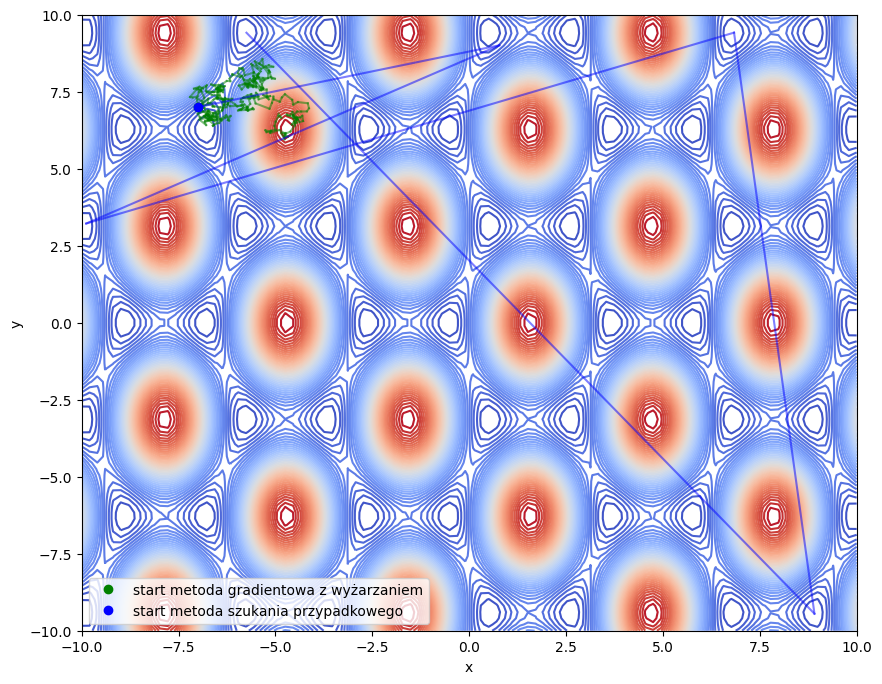

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# funkcja celu
def obj_func(x, y):
    return np.sin(x)*np.sin(x) + np.cos(y)*np.sin(x)

# metoda gradientowa z wyżarzaniem
def simulated_annealing(x0, T0, alpha, beta, gamma, n_iter):
    x = x0
    T = T0
    fval = obj_func(*x)
    x_hist = [x]
    fval_hist = [fval]

    for i in range(n_iter):
        # wygeneruj nowe x w okolicy obecnego x
        x_new = x + beta*np.random.normal(size=2)
        # oblicz różnicę wartości funkcji celu
        delta_f = obj_func(*x_new) - fval

        if delta_f < 0:
            # akceptuj nowe x
            x = x_new
            fval = obj_func(*x)
        else:
            # prawdopodobieństwo odrzucenia nowego x
            p = np.exp(-delta_f/(gamma*T))
            if np.random.uniform() < p:
                x = x_new

        # zmniejsz temperaturę
        T = alpha*T

        # zapisz historię
        x_hist.append(x)
        fval_hist.append(fval)

    return x, fval, x_hist, fval_hist

# metoda szukania przypadkowego
def random_search(x0, n_iter):
    x = x0
    fval = obj_func(*x)
    x_hist = [x]
    fval_hist = [fval]

    for i in range(n_iter):
        # wygeneruj nowe x
        x_new = np.random.uniform(low=-10, high=10, size=2)
        # oblicz wartość funkcji celu
        fval_new = obj_func(*x_new)

        if fval_new < fval:
            # akceptuj nowe x
            x = x_new
            fval = fval_new

        # zapisz historię
        x_hist.append(x)
        fval_hist.append(fval)

    return x, fval, x_hist, fval_hist

# początkowe parametry
x0 = np.array([-7.0, 7.0])
T0 = 100
alpha = 0.99
beta = 0.1
gamma = 1
n_iter = 5000

# metoda gradientowa z wyżarzaniem
x_sa, fval_sa, x_hist_sa, fval_hist_sa = simulated_annealing(x0, T0, alpha, beta, gamma, n_iter)

# metoda szukania przypadkowego
x_rs, fval_rs, x_hist_rs, fval_hist_rs = random_search(x0, n_iter)

# wykres
fig, ax = plt.subplots(figsize=(10, 8))

# funkcja celu
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = obj_func(X, Y)
ax.contour(X, Y, Z, levels=50, cmap='coolwarm')

# metoda gradientowa z wyżarzaniem
ax.plot(x_hist_sa[0][0], x_hist_sa[0][1], 'go', label='start metoda gradientowa z wyżarzaniem')
for i in range(len(x_hist_sa)-1):
    ax.plot([x_hist_sa[i][0], x_hist_sa[i+1][0]], [x_hist_sa[i][1], x_hist_sa[i+1][1]], 'g-', alpha=0.5)

# metoda szukania przypadkowego
ax.plot(x_hist_rs[0][0], x_hist_rs[0][1], 'bo', label='start metoda szukania przypadkowego')
for i in range(len(x_hist_rs)-1):
    ax.plot([x_hist_rs[i][0], x_hist_rs[i+1][0]], [x_hist_rs[i][1], x_hist_rs[i+1][1]], 'b-', alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

## EGZAMIN

# Wyznacz i narysuj krzywą regresji maszyny y = ax^2 + b, przechodzaca przez punkty [1,1],[2,3], [3,6]

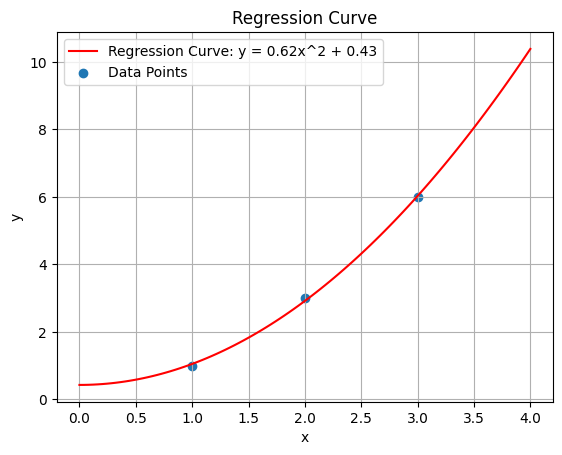

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Podane punkty
points = np.array([[1, 1], [2, 3], [3, 6]])

# Układ równań
A = np.vstack([points[:,0]**2, np.ones(len(points))]).T
b = points[:,1]

# Rozwiązanie układu równań
a, b = np.linalg.lstsq(A, b, rcond=None)[0]

# Generowanie krzywej regresji
x = np.linspace(0, 4, 100)
y_regression = a * x**2 + b

# Narysuj krzywą regresji i punkty
plt.plot(x, y_regression, label=f'Regression Curve: y = {a:.2f}x^2 + {b:.2f}', color='red')
plt.scatter(points[:,0], points[:,1], label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Curve')
plt.legend()
plt.grid(True)
plt.show()
